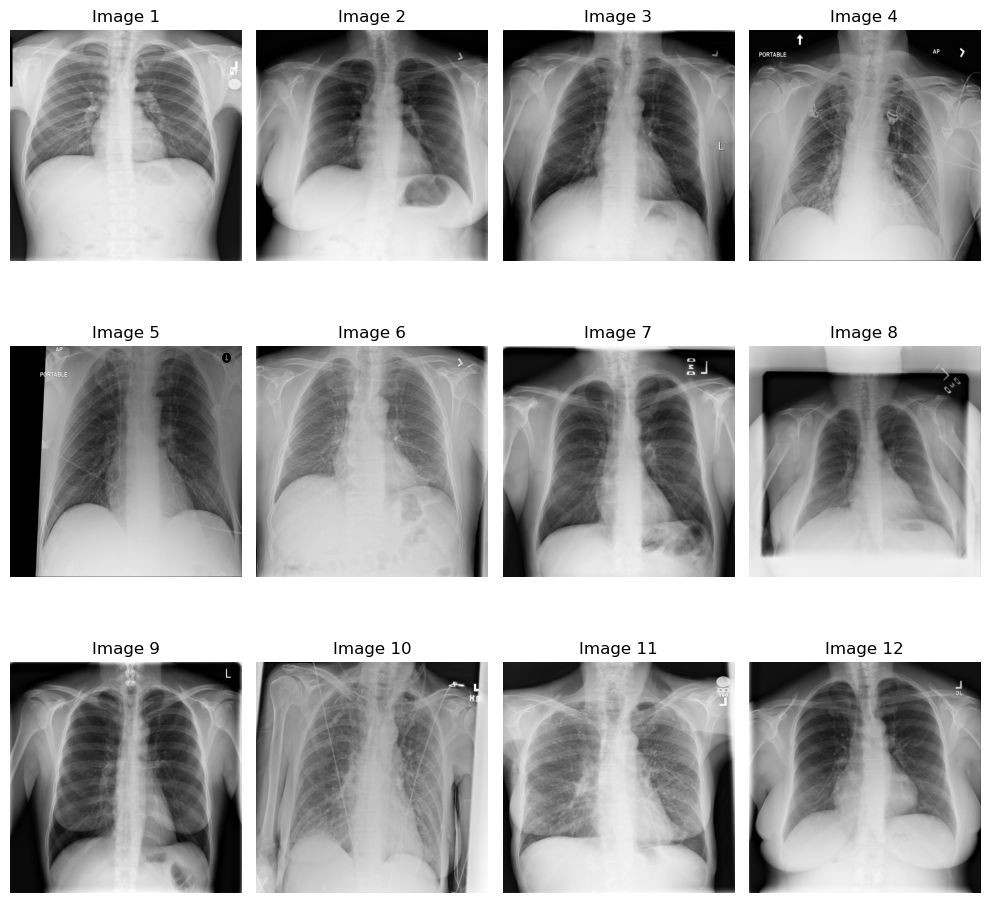

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

#  Cette variable contient le chemin du dossier o√π se trouvent les images  (raw data).
images_folder = "../data/raw/"

#  R√©cup√©rer la liste des fichiers image - filtre pour ne garder que les fichiers images
image_files = [f for f in os.listdir(images_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

#  Limiter le nombre d'images affich√©es
image_files = image_files[:12]

# Cr√©e une nouvelle figure de taille 10x10 pouces pour afficher plusieurs images.
plt.figure(figsize=(10, 10))

# Boucle d‚Äôaffichage des images
for i, file_name in enumerate(image_files):
    img_path = os.path.join(images_folder, file_name)
    
    #=Bloc try-except pour g√©rer les erreurs
    try:
        # Charger l'image avec PIL et la convertir en niveaux de gris 
        img = Image.open(img_path).convert('L')
        
          #Affichage de chaque image dans la grille
        plt.subplot(3, 4, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')
        

        #Gestion des erreurs (Si une image ne peut pas √™tre ouverte le programme n‚Äôarr√™te pas mais affiche un message d‚Äôerreur dans la console.)
    except Exception as e:
        print(f"Erreur avec l'image {file_name}: {e}")

#Ajustement final et affichage
plt.tight_layout()
plt.show()

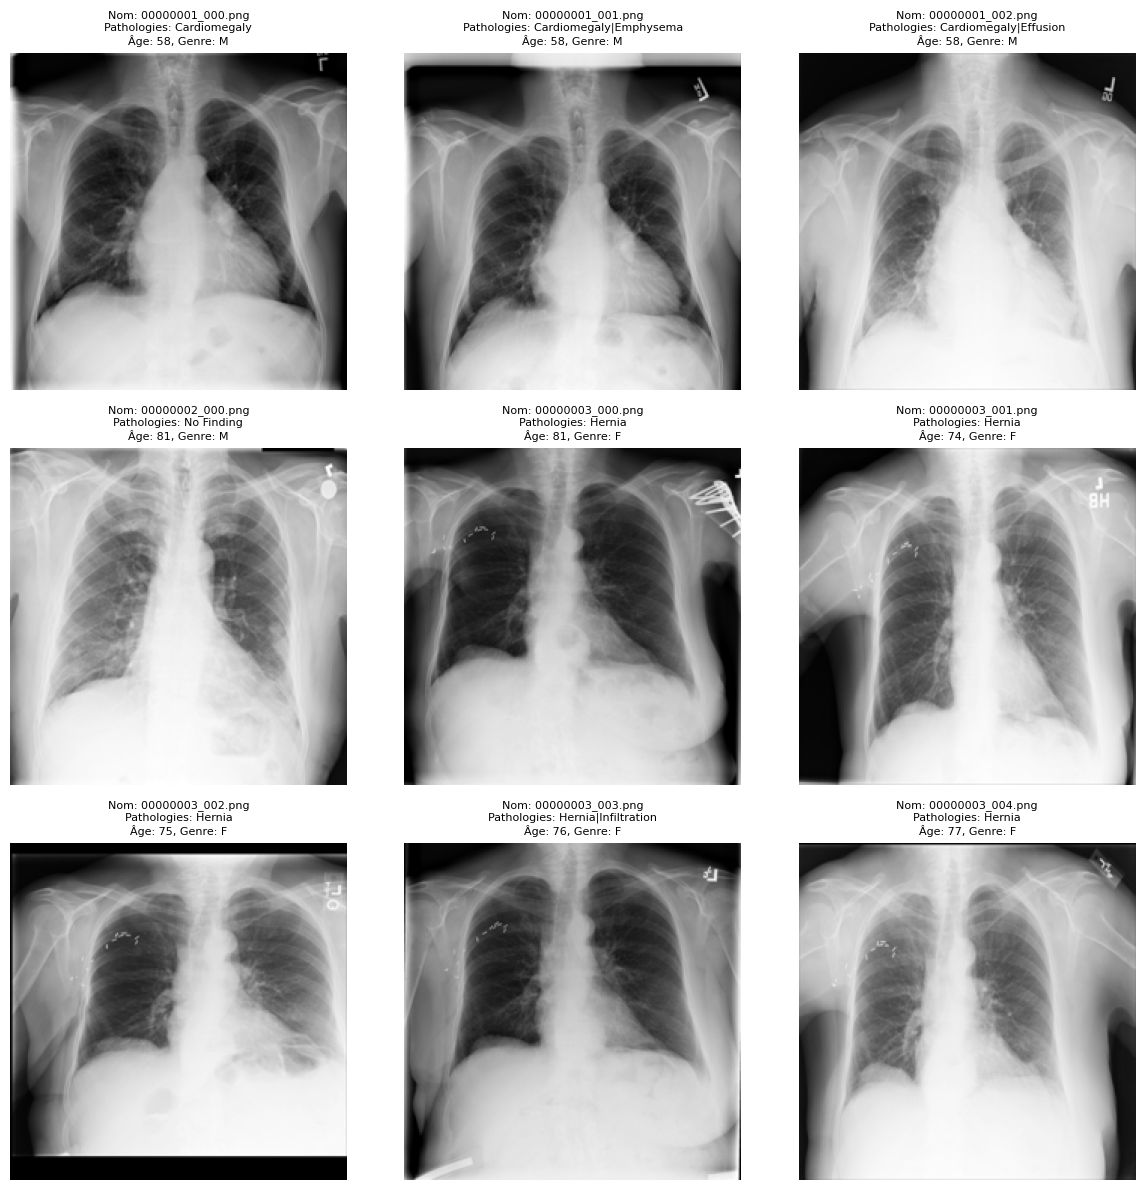

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# --- üìÅ Chemins vers les donn√©es ---
images_dir = "../data/raw/"  # dossier contenant les images
csv_file = "../data/raw/Data_Entry_2017.csv"  # fichier CSV contenant les m√©tadonn√©es

# --- üìÑ Lecture du fichier CSV ---
df = pd.read_csv(csv_file)

# --- ü©ª Fonction pour charger une image en niveaux de gris et la redimensionner ---
def load_image(img_name, size=(224, 224)):
    path = os.path.join(images_dir, img_name)
    try:
        img = Image.open(path).convert('L')  # Conversion en niveaux de gris
        img = img.resize(size)               # Redimensionnement
        img = np.array(img) / 255.0          # Normalisation entre 0 et 1
        return img
    except Exception as e:
        print(f"‚ùå Erreur lors du chargement de {path}: {e}")
        return None

# --- üß© S√©lection de 9 images d'exemple depuis le dataset ---
sample_images = df['Image Index'].head(9).tolist()

# --- üé® Cr√©ation d'une figure pour afficher les images ---
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# --- üîÅ Boucle pour afficher chaque image avec son √©nonc√© ---
for ax, img_name in zip(axes.flatten(), sample_images):
    img = load_image(img_name)  # Chargement de l'image
    if img is not None:
        # R√©cup√©ration des informations du patient depuis le DataFrame
        row = df[df['Image Index'] == img_name].iloc[0]
        
        # Cr√©ation du texte descriptif pour l'image
        description = (
            f"Nom: {row['Image Index']}\n"
            f"Pathologies: {row['Finding Labels']}\n"
            f"√Çge: {row['Patient Age']}, Genre: {row['Patient Gender']}"
        )
        
        # Affichage de l'image
        ax.imshow(img, cmap='gray')
        ax.set_title(description, fontsize=8)  # titre de l'image avec infos
    else:
        ax.set_title("Erreur de chargement", fontsize=8)
    
    ax.axis('off')

plt.tight_layout()
plt.show()
